In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [22]:
df_US=df[df["job_country"]=="United States"].copy()
df_US['job_posted_month']=df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot=df_US.pivot_table(index="job_posted_month",columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['job_posted_month_no']=pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot.sort_values('job_posted_month_no',inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns='job_posted_month_no',inplace=True)

In [23]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,529,34,8541,2590,6940,62,1554,765,1553,120
February,444,21,6117,2999,5007,62,1258,856,1132,91
March,434,20,6215,3127,4729,57,1120,845,1136,111
April,570,39,6032,2805,4899,50,1022,777,987,114
May,287,21,5010,2958,4389,48,852,736,897,89
June,445,27,5683,2850,4672,43,1015,803,1050,97
July,587,45,5178,2537,4852,66,873,741,1104,150
August,896,37,6654,3263,6284,71,1183,877,1509,192
September,889,50,4651,3166,4627,116,793,776,1021,231


In [24]:
df_US_software_pivot=pd.read_csv(" https://lukeb.co/software_csv",index_col='job_posted_month')

Another Way of making index in the pivot or data Frame 

In [28]:
 #df_US_software_pivot.set_index('job_posted_month')

In [30]:
df_merged=df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [39]:
top_5=(df_merged.sum().sort_values(ascending=False).head().index.to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

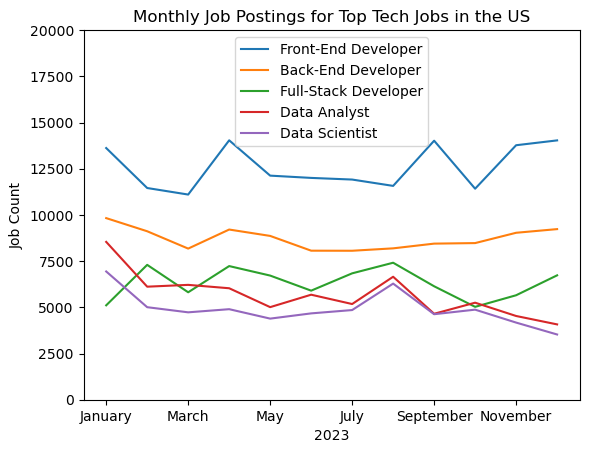

In [42]:
df_merged[top_5].plot(kind='line')
plt.title("Monthly Job Postings for Top Tech Jobs in the US")
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.show()